In [1]:
import sys
sys.path.insert(0, '../')
from lib import *
import matplotlib.colors as mcolors

%matplotlib inline

Text(0, 0.5, 'Pedestal STD [ADC counts]')

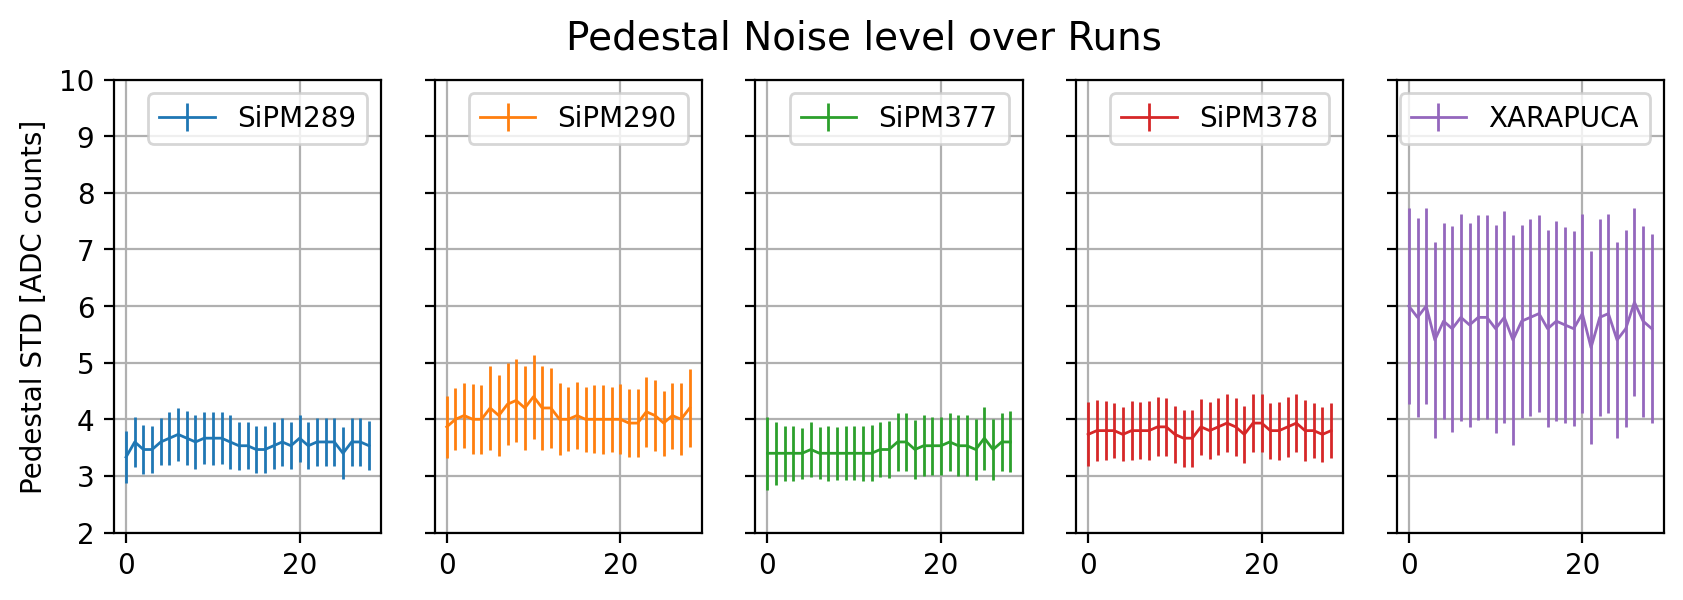

In [17]:

path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VIS/joython/"
Run_props=open_run_properties(0,"../macros/APSAIA_VIS.xlsx")
Runs=open_runs_table("../macros/APSAIA_VIS.xlsx")


# path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VUV/joython/"
# Run_props=open_run_properties(0,"../macros/APSAIA_VUV.xlsx")
# Runs=open_runs_table("../macros/APSAIA_VUV.xlsx")


colors=list(mcolors.TABLEAU_COLORS.keys())

fig, axs = plt.subplots(dpi=200,ncols=len(Run_props["Channels"]),figsize=[10,3],sharey=True)
plt.suptitle("Pedestal Noise level over Runs", fontsize=14)

i=0
for ch in Run_props["Channels"]:
    mean=[]
    ress=[]
    for run in Runs["Run"].array:
        if run>29: continue;
        
        Run_props=open_run_properties(run,"../macros/APSAIA_VUV.xlsx")
        run_path=path+"run"+str(run).zfill(2)+"/";
        compress=False
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        
        counts, bins=np.histogram(Pedestal_vars[ch]["STD"], 300,[0,20])
        mode=bins[np.argmax(counts)]
        resolution=np.std(Pedestal_vars[ch]["STD"][Pedestal_vars[ch]["STD"]<20])
        mean.append(mode)
        ress.append(resolution)
    axs[i].errorbar (range(len(mean)),mean,fmt='', yerr=ress,color= colors[i],linewidth=1)
    axs[i].set_ylim([2,10])
    axs [i].legend([Run_props["ChannelName"][i]])
    axs[i].grid()
    i+=1;
axs[0].set_ylabel("Pedestal STD [ADC counts]")


## Single Run, channels distribution

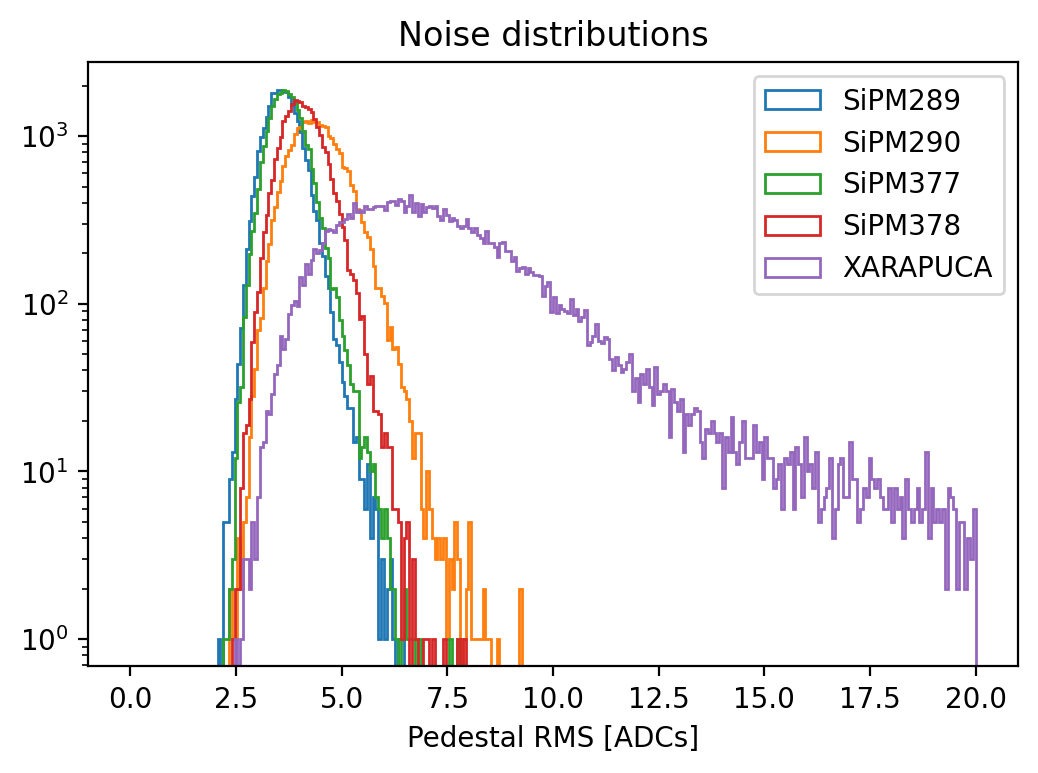

In [2]:
for run in [6]:
    Run_props=open_run_properties(run,"../macros/APSAIA_VUV.xlsx")
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False

    plt.figure(dpi=200)
    for ch in Run_props["Channels"]:
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        
        plt.hist(Pedestal_vars[ch]["STD"], 300,[0,20],histtype="step")
        
    plt.legend(Run_props["ChannelName"])
    plt.title ("Noise distributions")
    plt.xlabel("Pedestal RMS [ADCs]")
    plt.semilogy()